In [104]:
import numpy as np


class Linear(object):
    def __init__(self, in_features, out_features):
        """
        Initializes a linear (fully connected) layer.
        TODO: Initialize weights and biases.
        - Weights should be initialized to small random values (e.g., using a normal distribution).
        - Biases should be initialized to zeros.
        Formula: output = x * weight + bias
        """
        # Initialize weights and biases with the correct shapes.
        self.params = {"weight": None, "bias": None}
        self.grads = {"weight": None, "bias": None}
        # initialize with relative small numbers
        self.params["weight"] = np.random.randn(in_features, out_features) * 0.01
        self.params["bias"] = np.zeros(out_features)

    def forward(self, x):
        """
        Performs the forward pass using the formula: output = xW + b
        TODO: Implement the forward pass.
        """
        self.x = x
        return x @ self.params["weight"] + self.params["bias"]

    def backward(self, dout):
        """
        Backward pass to calculate gradients of loss w.r.t. weights and inputs.
        TODO: Implement the backward pass.
        """

        # print(f"dout shape before computation: {dout.shape}")
        # print(f"x shape: {self.x.shape}")

        self.grads["weight"] = self.x.T @ dout
        self.grads["bias"] = np.sum(dout, axis=0)

        return dout @ self.params["weight"].T


class ReLU(object):
    def forward(self, x):
        """
        Applies the ReLU activation function element-wise to the input.
        Formula: output = max(0, x)
        TODO: Implement the forward pass.
        """
        self.if_back = (x > 0)
        return np.maximum(0, x)

    def backward(self, dout):
        """
        Computes the gradient of the ReLU function.
        TODO: Implement the backward pass.
        Hint: Gradient is 1 for x > 0, otherwise 0.
        """
        return dout * self.if_back


class SoftMax(object):
    def forward(self, x):
        """
        Applies the softmax function to the input to obtain output probabilities.
        Formula: softmax(x_i) = exp(x_i) / sum(exp(x_j)) for all j
        TODO: Implement the forward pass using the Max Trick for numerical stability.
        """
        x_shifted = x - np.max(x, axis=1, keepdims=True)  # To avoid overflow
        exp_x = np.exp(x_shifted)
        self.probs = exp_x / np.sum(exp_x, axis=1, keepdims=True)  # compute softmax
        return self.probs

    def backward(self, dout):
        """
        The backward pass for softmax is often directly integrated with CrossEntropy for simplicity.
        TODO: Keep this in mind when implementing CrossEntropy's backward method.
        """
        return None


class CrossEntropy(object):
    def forward(self, x, y):
        """
        Computes the CrossEntropy loss between predictions and true labels.
        Formula: L = -sum(y_i * log(p_i)), where p is the softmax probability of the correct class y.
        TODO: Implement the forward pass.
        """
        self.y = y
        return -np.sum(y * np.log(x + 1e-12))  # Add a relative small number to avoid the occurrence of log(0)

    def backward(self, x, y):
        """
        Computes the gradient of CrossEntropy loss with respect to the input.
        TODO: Implement the backward pass.
        Hint: For softmax output followed by cross-entropy loss, the gradient simplifies to: p - y.
        """
        return x - y


In [105]:
from modules import *


class MLP(object):
    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes the multi-layer perceptron object.

        This function should initialize the layers of the MLP including any linear layers and activation functions
        you plan to use. You will need to create a list of linear layers based on n_inputs, n_hidden, and n_classes.
        Also, initialize ReLU activation layers for each hidden layer and a softmax layer for the output.

        Args:
            n_inputs (int): Number of inputs (i.e., dimension of an input vector).
            n_hidden (list of int): List of integers, where each integer is the number of units in each hidden layer.
            n_classes (int): Number of classes of the classification problem (i.e., output dimension of the network).
        """
        # Hint: You can use a loop to create the necessary number of layers and add them to a list.
        # Remember to initialize the weights and biases in each layer.

        # initialization
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_classes = n_classes

        self.layers = []
        in_features = n_inputs  # Initialize n_input_dimension

        # Add hidden layers
        for n_units in n_hidden:
            self.layers.append(Linear(in_features, n_units))  # Linear layer
            self.layers.append(ReLU())  # Activation layer
            in_features = n_units  # upgrade in_feature as cur_output units

        # 输出层
        self.layers.append(Linear(in_features, n_classes))  # 最后一层线性变换
        self.softmax = SoftMax()
        self.loss = CrossEntropy()  # 使用 Softmax 和交叉熵损失
        self.relu = ReLU()

    def forward(self, x):
        """
        Predicts the network output from the input by passing it through several layers.

        Here, you should implement the forward pass through all layers of the MLP. This involves
        iterating over your list of layers and passing the input through each one sequentially.
        Don't forget to apply the activation function after each linear layer except for the output layer.

        Args:
            x (numpy.ndarray): Input to the network.

        Returns:
            numpy.ndarray: Output of the network.
        """
        # Start with the input as the initial output
        out = x

        # use ReLU activation function to activate all layers except the final output
        for layer in self.layers:
            out = layer.forward(out)
            
        # print(f"out1:{out}")

        # TODO: Implement the forward pass through each layer.
        # Hint: For each layer in your network, you will need to update 'out' to be the layer's output.

        out = self.softmax.forward(out)
        
        # print(f"out2:{out}")

        return out

    def backward(self, dout):
        """
        Performs the backward propagation pass given the loss gradients.

        Here, you should implement the backward pass through all layers of the MLP. This involves
        iterating over your list of layers in reverse and passing the gradient through each one sequentially.
        You will update the gradients for each layer.

        Args:
            dout (numpy.ndarray): Gradients of the loss with respect to the output of the network.
        """
        # TODO: Implement the backward pass through each layer.
        # Hint: You will need to update 'dout' to be the gradient of the loss with respect to the input of each layer.

        # No need to return anything since the gradients are stored in the layers.

        # dout = self.loss.backward(dout, self.loss.y)
        # dout = self.loss.backward(dout)

        # Travel along the layers in reverse order
        for layer in reversed(self.layers):
            dout = layer.backward(dout)


In [110]:
import argparse
import numpy as np
from mlp_numpy import MLP
from modules import CrossEntropy, Linear
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Make_moon methods to generate dataset with noise = 0.2
X, y = make_moons(n_samples=1000, noise=0.2)

# One-hot encode the labels
num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)


def load_data():
    return X_train, X_test, y_train, y_test

input_dim:2
output_dim:2
Step: 0, Loss: 136.1305, Accuracy: 81.50%
Step: 10, Loss: 59.1761, Accuracy: 86.00%
Step: 20, Loss: 60.8083, Accuracy: 86.50%
Step: 30, Loss: 53.3824, Accuracy: 87.50%
Step: 40, Loss: 51.6082, Accuracy: 85.50%
Step: 50, Loss: 53.4293, Accuracy: 86.50%
Step: 60, Loss: 75.3715, Accuracy: 86.50%
Step: 70, Loss: 49.2135, Accuracy: 86.00%
Step: 80, Loss: 59.9885, Accuracy: 89.00%
Step: 90, Loss: 49.3308, Accuracy: 89.00%
Step: 100, Loss: 48.7779, Accuracy: 86.00%
Step: 110, Loss: 48.9869, Accuracy: 86.00%
Step: 120, Loss: 49.1072, Accuracy: 87.50%
Step: 130, Loss: 45.4160, Accuracy: 87.00%
Step: 140, Loss: 42.0044, Accuracy: 90.50%
Step: 150, Loss: 32.1935, Accuracy: 93.50%
Step: 160, Loss: 33.0984, Accuracy: 94.00%
Step: 170, Loss: 26.8601, Accuracy: 95.50%
Step: 180, Loss: 30.0830, Accuracy: 95.50%
Step: 190, Loss: 24.8784, Accuracy: 95.50%
Step: 200, Loss: 25.5186, Accuracy: 95.50%
Step: 210, Loss: 25.2676, Accuracy: 95.50%
Step: 220, Loss: 26.4359, Accuracy: 95.

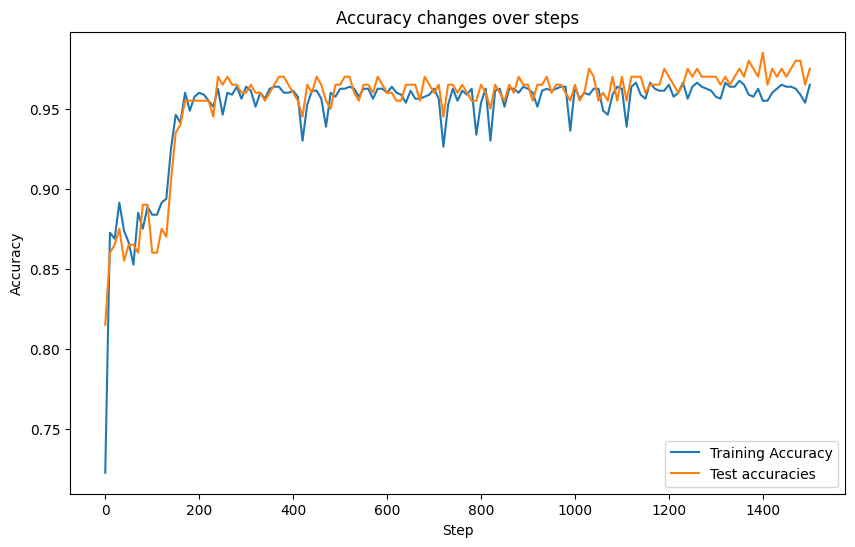

In [111]:
import argparse
import numpy as np
from mlp_numpy import MLP
from modules import CrossEntropy, Linear
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Default constants
DNN_HIDDEN_UNITS_DEFAULT = "20"
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500  # adjust if you use batch or not
EVAL_FREQ_DEFAULT = 10
SGD_DEFAULT = True

def accuracy(predictions, targets):
    """
    Computes the prediction accuracy, i.e., the percentage of correct predictions.

    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        targets: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding

    Returns:
        accuracy: scalar float, the accuracy of predictions as a percentage.
    """
    # TODO: Implement the accuracy calculation
    # Hint: Use np.argmax to find predicted classes, and compare with the true classes in targets
    # Get predicted class labels by taking argmax over classes (axis 1)
    pred_labels = np.argmax(predictions, axis=1)
    # Get true class labels from one-hot encoded targets
    true_labels = np.argmax(targets, axis=1)
    # Calculate the percentage of correct predictions``
    accuracy = np.mean(pred_labels == true_labels)
    return accuracy


def train(dnn_hidden_units, learning_rate, max_steps, eval_freq, sgd=False):
    """
    Performs training and evaluation of MLP model.

    Args:
        dnn_hidden_units: Comma separated list of number of units in each hidden layer
        learning_rate: Learning rate for optimization
        max_steps: Number of epochs to run trainer
        eval_freq: Frequency of evaluation on the test set
        NOTE: Add necessary arguments such as the data, your model...
    """
    # TODO: Load your data here
    X_train, X_test, y_train, y_test = load_data()

    dnn_hidden_units = list(map(int, dnn_hidden_units.split(",")))

    # TODO: Initialize your MLP model and loss function (CrossEntropy) here
    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]

    print(f"input_dim:{input_dim}")
    print(f"output_dim:{output_dim}")
    model = MLP(input_dim, dnn_hidden_units, output_dim)
    loss_function = CrossEntropy()

    # 创建用于存储训练和测试 Loss 的列表
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for step in range(max_steps):
        # print(f"s")
        if sgd:
            indices = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            batch_size = 100

            for i in range(
                0, X_train.shape[0], batch_size
            ):  # Iterate over each data sample
                x_i = X_train_shuffled[i : i + batch_size]  # Get the single sample
                y_i = y_train_shuffled[
                    i : i + batch_size
                ]  # Get the corresponding label

                # 1. Forward pass
                prediction = model.forward(x_i)

                # 2. Compute loss
                loss = loss_function.forward(prediction, y_i)

                # 3. Backward pass (compute gradients)
                dout = loss_function.backward(prediction, y_i)
                model.backward(dout)

                # 4. Update weights
                for layer in reversed(model.layers):
                    if isinstance(layer, Linear):
                        layer.params["weight"] -= learning_rate * layer.grads["weight"]
                        layer.params["bias"] -= learning_rate * layer.grads["bias"]

                # Record Loss
                train_losses.append(loss)

            # In the end of every round, compute the accuracy of the model
            # train_predictions = model.forward(X_train)
            # train_accuracy = accuracy(
            #     train_predictions, y_train
            # )  # 计算整个训练集的准确率
            # train_accuracies.append(train_accuracy)
        else:
            # TODO: Implement the training loop
            # 1. Forward pass
            # 2. Compute loss
            # 3. Backward pass (compute gradients)
            # 4. Update weights
            prediction = model.forward(X_train)

            # print(f"prediction:{prediction.shape}, {prediction}")
            # print(f"y_train:{y_train.shape},{y_train}")
            
            # final output layer propagation
            loss = loss_function.forward(prediction, y_train)
            # print(f"lossx:{loss}")
            dloss = loss_function.backward(prediction, y_train)
            model.backward(dloss)

            for layer in reversed(model.layers):
                if isinstance(layer, Linear):
                    layer.params["weight"] -= learning_rate * layer.grads["weight"]
                    layer.params["bias"] -= learning_rate * layer.grads["bias"]

            train_losses.append(loss)

            train_accuracy = accuracy(prediction, y_train)
            train_accuracies.append(train_accuracy)

        if step % eval_freq == 0 or step == max_steps - 1:
            # TODO: Evaluate the model on the test set
            # 1. Forward pass on the test set
            # 2. Compute loss and accuracy
            test_predictions = model.forward(X_test)
            test_loss = loss_function.forward(test_predictions, y_test)
            test_accuracy = accuracy(test_predictions, y_test)
            train_predictions = model.forward(X_train)
            train_accuracy = accuracy(
                train_predictions, y_train
            )  # 计算整个训练集的准确率
            train_accuracies.append(train_accuracy)
            # 记录测试集 Loss
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
            print(
                f"Step: {step}, Loss: {test_loss:.4f}, Accuracy: {test_accuracy * 100:.2f}%"
            )

    print("Training complete!")

    if sgd == False:
        # 训练结束后绘制 Loss 变化图
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label="Training Loss")
        # plt.plot(range(0, max_steps + 1, eval_freq), test_losses, label="Test Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.title("Loss Change Over Steps")
        plt.legend()
        plt.show()

    # 训练结束后绘制 test 变化图
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, max_steps + 1, eval_freq),train_accuracies, label="Training Accuracy")
    plt.plot(
        range(0, max_steps + 1, eval_freq), test_accuracies, label="Test accuracies"
    )
    plt.xlabel("Step")
    plt.ylabel("Accuracy")
    plt.title("Accuracy changes over steps")
    plt.legend()
    plt.show()


def main():
    """
    Main function.
    """
    # Parsing command line arguments
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--dnn_hidden_units",
        type=str,
        default=DNN_HIDDEN_UNITS_DEFAULT,
        help="Comma separated list of number of units in each hidden layer",
    )
    parser.add_argument(
        "--learning_rate",
        type=float,
        default=LEARNING_RATE_DEFAULT,
        help="Learning rate",
    )
    parser.add_argument(
        "--max_steps",
        type=int,
        default=MAX_EPOCHS_DEFAULT,
        help="Number of epochs to run trainer",
    )
    parser.add_argument(
        "--eval_freq",
        type=int,
        default=EVAL_FREQ_DEFAULT,
        help="Frequency of evaluation on the test set",
    )
    parser.add_argument(
        "--if_sgd",
        type=bool,
        default=SGD_DEFAULT,
        help="If using stochastic gradient descent method",
    )
    FLAGS = parser.parse_known_args()[0]

    train(
        FLAGS.dnn_hidden_units,
        FLAGS.learning_rate,
        FLAGS.max_steps,
        FLAGS.eval_freq,
        FLAGS.if_sgd,
    )


if __name__ == "__main__":
    main()


As you can see from the above plot, I copy the code from assignment1 and the best performance of this task is while we use stochastic gradient descent and batch_size = 100

In [108]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn


class MLP(nn.Module):

    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes multi-layer perceptron object.
        Args:
            n_inputs: number of inputs (i.e., dimension of an input vector).
            n_hidden: list of integers, where each integer is the number of units in each linear layer
            n_classes: number of classes of the classification problem (i.e., output dimension of the network)
        """

        super(MLP, self).__init__()
        layers = []

        # input layer
        layers.append(nn.Linear(n_inputs, n_hidden[0]))
        layers.append(nn.Sigmoid())

        for i in range(1, len(n_hidden)):
            layers.append(nn.Linear(n_hidden[i - 1], n_hidden[i]))
            layers.append(nn.Sigmoid())

        # output layer
        layers.append(nn.Linear(n_hidden[-1], n_classes))

        # Generate model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        """
        Predict network output from input by passing it through several layers.
        Args:
            x: input to the network
        Returns:
            out: output of the network
        """

        out = self.model(x)
        return out


2.4.1+cpu
torch.cude.is_avaiableFalse
device:cpu
Epoch [10/1500], Loss: 0.6953, Train Accuracy: 50.62%, Test Accuracy: 47.50%
Epoch [20/1500], Loss: 0.6899, Train Accuracy: 51.50%, Test Accuracy: 47.50%
Epoch [30/1500], Loss: 0.6852, Train Accuracy: 71.00%, Test Accuracy: 72.00%
Epoch [40/1500], Loss: 0.6807, Train Accuracy: 70.50%, Test Accuracy: 75.50%
Epoch [50/1500], Loss: 0.6762, Train Accuracy: 71.25%, Test Accuracy: 79.00%
Epoch [60/1500], Loss: 0.6718, Train Accuracy: 73.25%, Test Accuracy: 80.00%
Epoch [70/1500], Loss: 0.6675, Train Accuracy: 74.12%, Test Accuracy: 80.50%
Epoch [80/1500], Loss: 0.6631, Train Accuracy: 74.38%, Test Accuracy: 81.00%
Epoch [90/1500], Loss: 0.6588, Train Accuracy: 75.25%, Test Accuracy: 81.00%
Epoch [100/1500], Loss: 0.6544, Train Accuracy: 75.38%, Test Accuracy: 81.50%
Epoch [110/1500], Loss: 0.6500, Train Accuracy: 75.62%, Test Accuracy: 81.50%
Epoch [120/1500], Loss: 0.6456, Train Accuracy: 76.00%, Test Accuracy: 82.00%
Epoch [130/1500], Loss: 

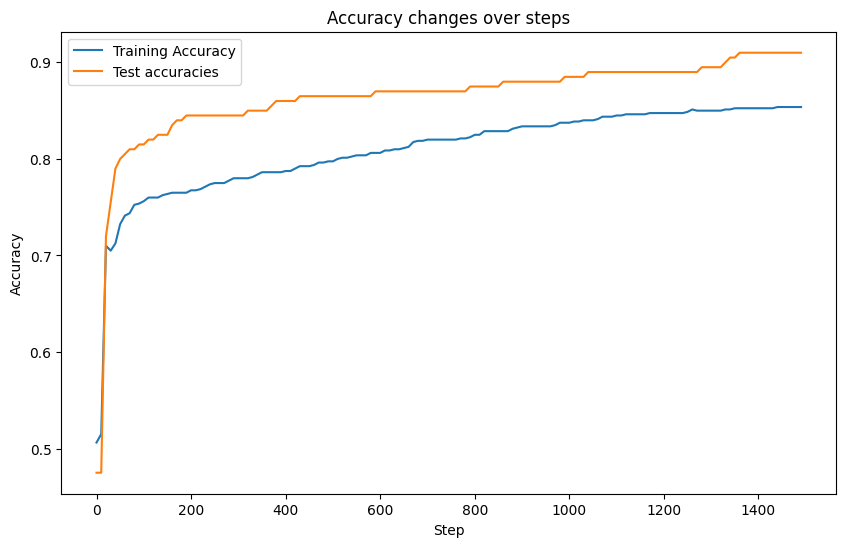

In [109]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import os
import torch
from pytorch_mlp import MLP

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn

# Default constants
DNN_HIDDEN_UNITS_DEFAULT = "20"
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

FLAGS = None


def accuracy(predictions, targets):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """
    pred_labels = np.argmax(predictions, axis=1)
    # Get true class labels from one-hot encoded targets
    true_labels = np.argmax(targets, axis=1)
    # Calculate the percentage of correct predictions
    accuracy = np.mean(pred_labels == true_labels)
    return accuracy


def train():
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE

    X_train, X_test, y_train, y_test = load_data()

    print(f"torch.cude.is_avaiable{torch.cuda.is_available()}")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    print(f"device:{device}")

    dnn_hidden_units = list(map(int, FLAGS.dnn_hidden_units.split(",")))
    # print(f"dnn_hidden_units are :{dnn_hidden_units}")

    # print(f"X_train:{X_train}")
    # print(f"y_train:{y_train}")

    input_dim = X_train.shape[1]
    output_dim = y_train.shape[1]

    # print(f"outputdim:{output_dim}")

    model = MLP(input_dim, dnn_hidden_units, output_dim)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=FLAGS.learning_rate)

    # print(f"y_train shape: {y_train.shape}")

    BATCH_SIZE = 100
    # Convert training and testing data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(
        device
    )  # Convert to class indices
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # print(f"X_train_tensor:{X_train_tensor}")
    # print(f"Y_train_tensor:{y_train_tensor}")

    # 创建 TensorDataset 和 DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    test_accuracies = []
    train_accuracies = []

    for epoch in range(FLAGS.max_steps):
        model.train()  # Set model to training mode

        for X_batch, y_batch in train_loader:
            # print(f"about y_barch:{y_batch.shape}, {y_batch}")
            optimizer.zero_grad()  # Clear gradients
            outputs = model(X_train_tensor)  # Forward pass

            # Check the shape of y_train_tensor
            # print(f"y_train_tensor shape: {y_train_tensor.shape}")

            # print(f"outputs:{outputs.shape}, {outputs}")
            # print(f"y_batch:{y_batch.shape}, {y_batch}")

            softmax = nn.Softmax(dim=1)  # 实例化 Softmax，指定维度
            outputs = softmax(outputs)  # 应用 Softmax
            # outputs = nn.Softmax(outputs, dim=1)

            # print(f"outputs2:{outputs.shape}, {outputs}")
            # print(f"y_batch2:{y_batch.shape}, {y_batch}")

            final_loss = loss(outputs, y_train_tensor.argmax(dim=1))  # Calculate loss
            # print(f"first_final_loss:{final_loss.item():.4f}")
            final_loss.backward()  # Backward pass
            optimizer.step()  # Update weights

        if (epoch + 1) % FLAGS.eval_freq == 0:
            model.eval()  # Set model to evaluation mode
            with torch.no_grad():
                train_predictions = model(X_train_tensor)
                test_predictions = model(X_test_tensor)

                # print(f"train_prediction:{train_predictions.shape},{train_predictions}")

                # Compute accuracy
                train_accuracy = accuracy(
                    train_predictions.cpu().numpy(), y_train_tensor.cpu().numpy()
                )
                test_accuracy = accuracy(
                    test_predictions.cpu().numpy(), y_test_tensor.cpu().numpy()
                )
                
                test_accuracies.append(test_accuracy)
                train_accuracies.append(train_accuracy)

                print(
                    f"Epoch [{epoch + 1}/{FLAGS.max_steps}], "
                    f"Loss: {final_loss.item():.4f}, "
                    f"Train Accuracy: {train_accuracy * 100:.2f}%, "
                    f"Test Accuracy: {test_accuracy * 100:.2f}%"
                )
                
    # 训练结束后绘制 test 变化图
    
    # print(len(train_accuracies))
    # x = list(range(0, FLAGS.max_steps, FLAGS.eval_freq))
    # print(f"x length: {len(x)}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, FLAGS.max_steps, FLAGS.eval_freq),train_accuracies, label="Training Accuracy")
    plt.plot(
        range(0, FLAGS.max_steps, FLAGS.eval_freq), test_accuracies, label="Test accuracies"
    )
    plt.xlabel("Step")
    plt.ylabel("Accuracy")
    plt.title("Accuracy changes over steps")
    plt.legend()
    plt.show()


def main():
    """
    Main function
    """
    train()


if __name__ == "__main__":
    # Command line arguments
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--dnn_hidden_units",
        type=str,
        default=DNN_HIDDEN_UNITS_DEFAULT,
        help="Comma separated list of number of units in each hidden layer",
    )
    parser.add_argument(
        "--learning_rate",
        type=float,
        default=LEARNING_RATE_DEFAULT,
        help="Learning rate",
    )
    parser.add_argument(
        "--max_steps",
        type=int,
        default=MAX_EPOCHS_DEFAULT,
        help="Number of epochs to run trainer.",
    )
    parser.add_argument(
        "--eval_freq",
        type=int,
        default=EVAL_FREQ_DEFAULT,
        help="Frequency of evaluation on the test set",
    )
    FLAGS, unparsed = parser.parse_known_args()

    print(torch.__version__)
    main()
